# Лекция 12: структурированные матрицы, быстрое преобразование Фурье (FFT), свёртки, Тёплицевы матрицы

## На прошлой лекции

- Итерационные методы для поиска собственных значений:
    - аппроксимация Ритца
    - PINVIT
    - LOBPCG
    - метод Якоби-Дэвидсона

## Другие классы структурированых матриц

- До сих пор мы обсуждали предобуславливание только для **разреженных матриц**
- Но итерационные методы работают хорошо для любых матриц, которые можно эффективно умножать на вектор 
- Важный класс таких матриц образуют **Тёплицевы матрицы** (и **Ганкелевы матрицы**), а также их многоуровневые модификации
- Они напрямую связаны с операцией **свёртки** и **быстрым преобразованием Фурье**

## Свёртка

- Одна из основных операций в обработке сигналов/машинном обучении – это **свёртка двух функций**.

- Пусть $x(t)$ и $y(t)$ две данные функции. Их свёртка определяется как

$$(x * y)(t) = \int_{-\infty}^{\infty} x(\tau) y(t -  \tau) d \tau.$$

## Теорема о свёртке и преобразование Фурье

Широко известный факт: *свёртка* во временном пространстве (**time domain**) эквивалентна *произведению* в частотном пространстве (**frequency domain**). 

- Преобразование из одного пространства в другое осуществляется с помощью **преобразования Фурье**:

$$\widehat{x}(w) = (\mathcal{F}(x))(w) = \int_{-\infty}^{\infty} e^{i w t} x(t) dt.$$

- Тогда

$$\mathcal{F}(x * y) = \mathcal{F}(x) \mathcal{F}(y).$$

- Таким образом, алгритм вычисленеия свёртки можно записать следующим образом:


1. Вычислить преобразование Фурье от $x(t)$ и $y(t)$. 
2. Вычислить их произведение
3. Применить к результапту обратное преобразование Фурье

## Операция дискретной свёртки

$$(x * y)(t) = \int_{-\infty}^{\infty} x(\tau) y(t -  \tau) d \tau.$$

- Давайте приблизим интеграл с помощью суммы значений подынтегрального выражения на равномерной сетке.

- Тогда нам останется просуммировать выражение

$$z_i = \sum_{j=0}^{n-1} x_j y_{i - j},$$

которое называется **дискретной свёрткой**. Его можно рассматривать как применение фильтра с коэффициентами $x$ к сигналу $y$. 

- Существуют разные фильтры для разных целей, но все они обладают свойством инвариантности к сдвигу (**shift-invariant structure**).

## Дискретная свёртка и Тёплицевы матрицы

Дискретную свёртку можнопредставить как умножение матрицы на вектор:

$$z_i = \sum_{j=0}^{n-1} x_j y_{i - j}, \Leftrightarrow z = Ax$$

где элементы матрицы $A$ равны $a_{ij} = y_{i-j}$, то есть они зависят только от разности между индексами строки и столбца.


## Тёплицевы матрицы: определение

Матрица называется **Тёплицевой**, если её элементы определены как

$$a_{ij} = t_{i - j}.$$

- Тёплицева матрица полностью определяется первой строкой и первым столбцом (то есть $2n-1$ параметр).

- Это плотная матрица, однако она имеет структуру, то есть определяется $\mathcal{O}(n)$ параметрами (сравните с разреженными матрицами)

- Основная операция для вычисления дискретной свёртки – это произведение Тёплицевой матрицы на вектор.

- Можно ли его вычислить быстрее чем за $\mathcal{O}(n^2)$?

## Тёплицевы матрицы и циркулянт

- Для специального класса Тёплицевых матриц, который называется **циркулянтными матрицами** (или просто циркулянтами), возможно вычислить произведения матрицы на вектор быстро

- Матрица $C$ называется циркулянтом, если

$$C_{ij} = c_{i - j \mod n},$$

то есть 

$$C = \begin{bmatrix} c_0 & c_1 & c_2 & c_3 \\
 c_3 & c_0 & c_1 & c_2 \\
 c_2 & c_3 & c_0 & c_1 \\
 c_1 & c_2 & c_3 & c_0 \\
 \end{bmatrix}.
 $$

## Спектральная теорема для циркулянтов

**Теорема**

Любая циркулянтная матрица может быть представлена в виде

$$C = \frac{1}{n} F^* \Lambda F,$$

где $F$ – **матрица Фурье** с элементами

$$F_{kl} = w_n^{kl}, \quad k, l = 0, \ldots, n-1, \quad w_n = e^{-\frac{2 \pi i}{n}},$$

а матрица $\Lambda = \text{diag}(\lambda)$ диагональная и 

$$\lambda = F c, $$

где $c$ – первый столбец циркулянта $C$.

Доказательство будет позже, сейчас рассмотрим свойства матрицы Фурье.

## Матрица Фурье

Матрица Фурье определяется как:

$$
F_n =
\begin{pmatrix}
1 & 1 & 1 & \dots & 1 \\
1 & w^{1\cdot 1}_n & w^{1\cdot 2}_n & \dots & w^{1\cdot (n-1)}_n\\
1 & w^{2\cdot 1}_n & w^{2\cdot 2}_n & \dots & w^{2\cdot (n-1)}_n\\
\dots & \dots & \dots &\dots &\dots \\
1 & w^{(n-1)\cdot 1}_n & w^{(n-1)\cdot 2}_n & \dots & w^{(n-1)\cdot (n-1)}_n\\
\end{pmatrix},
$$

или эквивалентно

$$ F_n = \{ w_n^{kl} \}_{k,l=0}^{n-1}, $$

где 

$$w_n = e^{-\frac{2\pi i}{n}}.$$

**Свойства:**

* Симметричная (но не эрмитова!)
* Унитарна с точностью до нормализующего множителя: $F_n^* F_n = F_n F_n^* = nI$ (проверьте этот факт!). Поэтому $F_n^{-1} = \frac{1}{n}F^*_n$
* Может быть умножена на вектора (произведение называется дискретным преобразованием Фурье (DFT)) за  <font color='red'>$\mathcal{O}(n \log n)$</font> операций (операция называется быстрым преобразованием Фурье или <font color='red'>FFT</font>)! 
* FFT помогает анализировать спектр сигнала и, как мы увидим далее, позволяет быстро умножать некоторый класс матриц на вектор.

Text(0.5, 1.0, 'Initial signal')

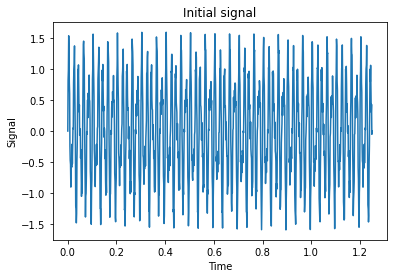

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


N = 1000
dt = 1.0 / 800.0
x = np.linspace(0.0, N*dt, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) + 0.2*np.sin(300.0 * 2.0*np.pi*x)
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Initial signal')

Text(0.5, 1.0, 'Discrete Fourier transform')

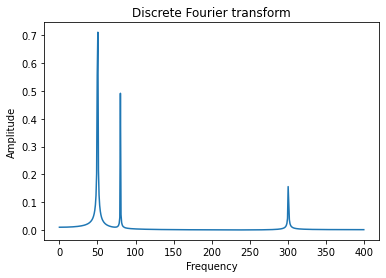

In [2]:
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*dt), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2])) #Note: N/2 to N will give negative frequencies
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Discrete Fourier transform')

## Быстрое преобразование Фурье (FFT)

Далее мы рассмотрим матричную интерпретацию стандартного [алгоритма Cooley-Tukey (1965)](https://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/S0025-5718-1965-0178586-1.pdf), который основан на идее **разделяй и властвуй**. В современных библиотеках используются более совершенные версии этого алгоритма.

- Пусть $n$ является некоторой степенью 2. 
- Сначала мы <font color='red'> переставим строки </font> матрицы Фурье так чтобы первые $n/2$ строк новой матрицы соответствовали строкам исходной матрицы с номерами <font color='red'>$1,3,5,\dots,n-1$</font>, а оставшиеся $n/2$ строк – строкам с номерами <font color='red'>$2,4,6\dots,n$</font>. 

- Эта перестановка может быть выражена как умножение Фурье матрицы на матрицу перестановки $P_n$:

$$
P_n =
\begin{pmatrix}
1 & 0 & 0 & 0 & \dots & 0 & 0 \\
0 & 0 & 1 & 0 &\dots & 0 & 0 \\
\vdots & & & & & & \vdots \\
0 & 0 & 0 & 0 &\dots & 1 & 0 \\
\hline
0 & 1 & 0 & 0 & \dots & 0 & 0 \\
0 & 0 & 0 & 1 &\dots & 0 & 0 \\
\vdots & & & & & & \vdots \\
0 & 0 & 0 & 0 &\dots & 0 & 1 
\end{pmatrix},
$$

Таким образом,

$$
P_n F_n =
\begin{pmatrix}
1 & 1 & 1 & \dots & 1 \\
1 & w^{2\cdot 1}_n & w^{2\cdot 2}_n & \dots & w^{2\cdot (n-1)}_n\\
1 & w^{4\cdot 1}_n & w^{4\cdot 2}_n & \dots & w^{4\cdot (n-1)}_n\\
\vdots & & & & \vdots\\
1 & w^{(n-2)\cdot 1}_n & w^{(n-2)\cdot 2}_n & \dots & w^{(n-2)\cdot (n-1)}_n\\
\hline
1 & w^{1\cdot 1}_n & w^{1\cdot 2}_n & \dots & w^{1\cdot (n-1)}_n\\
1 & w^{3\cdot 1}_n & w^{3\cdot 2}_n & \dots & w^{3\cdot (n-1)}_n\\           
\vdots & & & & \vdots\\
1 & w^{(n-1)\cdot 1}_n & w^{(n-1)\cdot 2}_n & \dots & w^{(n-1)\cdot (n-1)}_n\\
\end{pmatrix},
$$

Теперь представим, что мы разделили столбцы и строки на две части, каждая размером $n/2$.

В результате получим <font color='red'>$2\times 2$ блочную матрицу</font> следующего вида

$$
P_n F_n =
\begin{pmatrix}
\left\{w^{2kl}_n\right\} & \left\{w_n^{2k\left(\frac{n}{2} + l\right)}\right\} \\
\left\{w_n^{(2k+1)l}\right\} & \left\{w_n^{(2k+1)\left(\frac{n}{2} + l\right)}\right\}
\end{pmatrix},
\quad k,l = 0,\dots, \frac{n}{2}-1.
$$

- Пока это не выглядит, как что-то что будет работать быстрее, но скоро мы эт увидим.

- Рассмотрим более подробно первый блок $\left\{w^{2kl}_n\right\}$:

$$
w^{2kl}_n = e^{-2kl\frac{2\pi i}{n}} = e^{-kl\frac{2\pi i}{n/2}} = w^{kl}_{n/2}.
$$

То есть этот блок в точности Фурье матрица в два раза меньшего размера $F_{n/2}$!


$$
\begin{pmatrix}
F_{n/2} & \left\{w_n^{2k\left(\frac{n}{2} + l\right)}\right\} \\
\left\{w_n^{(2k+1)l}\right\} & \left\{w_n^{(2k+1)\left(\frac{n}{2} + l\right)}\right\}
\end{pmatrix}
$$

Блок $\left\{w_n^{(2k+1)l}\right\}$ может быть записан как

$$
w_n^{(2k+1)l} = w_n^{2kl + l} = w_n^{l} w_n^{2kl} = w_n^{l} w_{n/2}^{kl},
$$

что можно записать как $W_{n/2}F_{n/2}$, где 

$$W_{n/2} = \text{diag}(1,w_n,w_n^2,\dots,w_n^{n/2-1}).$$

Проделвая аналогичные преобразования с оставшимися блоками, получим в итоге

$$
P_n F_n =
\begin{pmatrix}
F_{n/2} & F_{n/2} \\
F_{n/2}W_{n/2} & -F_{n/2}W_{n/2}
\end{pmatrix} =
\begin{pmatrix}
F_{n/2} & 0 \\
0 & F_{n/2}
\end{pmatrix}
\begin{pmatrix}
I_{n/2} & I_{n/2} \\
W_{n/2} & -W_{n/2}
\end{pmatrix}.
$$

- Таким образом, мы <font color='red'>свели умножение $F_n$ к 2 умножениям на $F_{n/2}$</font> и быстрому умножению на диагональную матрицу. 
- Применив полученные выражения рекурсивно к $F_{n/2}$, мы получим сложность <font color='red'>$\mathcal{O}(n\log n)$ </font>.

In [2]:
#FFT vs full matvec
import time
import numpy as np
import scipy as sp
import scipy.linalg

n = 10000
F = sp.linalg.dft(n)
x = np.random.randn(n)

y_full = F.dot(x)

full_mv_time = %timeit -q -o F.dot(x)
print('Full matvec time =', full_mv_time.average)

y_fft = np.fft.fft(x)
fft_mv_time = %timeit -q -o np.fft.fft(x)
print('FFT time =', fft_mv_time.average)

print('Relative error =', (np.linalg.norm(y_full - y_fft)) / np.linalg.norm(y_full))

Full matvec time = 0.06917304271482862
FFT time = 3.3967071485988395e-05
Relative error = 1.550139758681484e-12


## Циркулянтные матрицы

- FFT помогает быстро умножать некоторые типы матриц на вектор. 
- Начнём с циркулянтов:

$$
C =
\begin{pmatrix} 
c_0 & c_{n-1} & c_{n-2} & \dots & c_1 \\
c_{1} & c_{0} & c_{n-1} & \dots & c_2 \\
c_{2} & c_{1} & c_0 & \dots & c_3 \\
\dots & \dots & \dots & \dots & \dots \\
c_{n-1} & c_{n-2} & c_{n-3} & \dots & c_0
\end{pmatrix}
$$

### Спектральное разложение циркулянта

**Теорема** 

Пусть $C$ циркулянт размера $n\times n$ и пусть $c$ его первый столбец, тогда

$$
C = \frac{1}{n} F_n^* \text{diag}(F_n c) F_n 
$$

*Доказательство*

- Рассмотрим число 

$$\lambda (\omega) = c_0 + \omega c_1 + \dots + \omega^{n-1} c_{n-1},$$ 

где $\omega$ любое число такое что $\omega^n=1$. 
- Умножим $\lambda$ на $1,\omega,\dots, \omega^{n-1}$:

$$
\begin{split}
\lambda & = c_0 &+& \omega c_1 &+& \dots &+& \omega^{n-1} c_{n-1},\\
\lambda\omega & = c_{n-1} &+& \omega c_0 &+& \dots &+& \omega^{n-1} c_{n-2},\\
\lambda\omega^2 & = c_{n-2} &+& \omega c_{n-1} &+& \dots &+& \omega^{n-1} c_{n-3},\\
&\dots\\
\lambda\omega^{n-1} & = c_{1} &+& \omega c_{2} &+& \dots &+& \omega^{n-1} c_{0}.
\end{split}
$$

- Поэтому,

$$
\lambda(\omega) \cdot \begin{pmatrix} 1&\omega & \dots& \omega^{n-1} \end{pmatrix} =
\begin{pmatrix} 1&\omega&\dots& \omega^{n-1} \end{pmatrix} \cdot C.
$$

- Запишем это для $\omega = 1,w_n, \dots, w_n^{n-1}$ и получим

$$
\Lambda F_n = F_n C
$$

и наконец

$$
C = \frac{1}{n} F^*_n \Lambda F_n, \quad \text{где}\quad \Lambda = \text{diag}(F_nc) \qquad\blacksquare
$$

## Быстрый матвек с циркулянтом

- Представление $C = \frac{1}{n} F^* \text{diag}(F_n c) F_n $ даёт нам явный способ умножения вектора $x$ на $C$ за $\mathcal{O}(n\log n)$ операций. 
- В самом деле

$$
Cx = \frac{1}{n} F_n^* \text{diag}(F_n c) F_n x = \text{ifft}\left( \text{fft}(c) \circ \text{fft}(x)\right)
$$

где $\circ$ обозначает поэлементное произведение (произведение Адамара) двух векторов (так как $\text{diag}(a)b = a\circ b$) и ```ifft``` обозначает обратное преобразование Фурье $F^{-1}_n$.

In [5]:
import numpy as np
import scipy as sp
import scipy.linalg

def circulant_matvec(c, x):
    return np.fft.ifft(np.fft.fft(c) * np.fft.fft(x))

n = 2048
c = np.random.random(n)
C = sp.linalg.circulant(c)
x = np.random.randn(n)


y_full = C.dot(x)
full_mv_time = %timeit -q -o C.dot(x)
print('Full matvec time =', full_mv_time.average)


y_fft = circulant_matvec(c, x)
fft_mv_time = %timeit -q -o circulant_matvec(c, x)
print('FFT time =', fft_mv_time.average)

print('Relative error =', (np.linalg.norm(y_full - y_fft)) / np.linalg.norm(y_full))

Full matvec time = 0.000976655543571464
FFT time = 0.00010271472058571557
Relative error = 4.481146334016571e-16


## Тёплицевы матрицы

Теперь вернёмся к Тёплицевым матрицам!

$$
T =
\begin{pmatrix} 
t_0 & t_{-1} & t_{-2} & t_{-3}& \dots & t_{1-n} \\
t_{1} & t_{0} & t_{-1} & t_{-2}& \dots & t_{2-n} \\
t_{2} & t_{1} & t_0 & t_{-1} &\dots & t_{3-n} \\
t_{3} & t_{2} & t_1 & t_0 & \dots & t_{4-n} \\
\dots & \dots & \dots & \dots & \dots & \dots\\
t_{n-1} & t_{n-2} & t_{n-3} & t_{n-4} &\dots &t_0
\end{pmatrix},
$$

или эквивалентно $T_{ij} = t_{i-j}$.

Операция умножения матрицы на вектор можно записать в виде

$$
y_i = \sum_{j=1}^n t_{i-j} x_j.
$$

- Эта операция эквивалентна применению дискретной свёртки фильтра $t_i$ к сигналу $x_i$.
- Быстрое вычисление свёртки имеет многочисленные приложения, напрмиер в обработке сигналов а также в интегральных уравнениях и уравнениях с частными производными
- Далее посмотрим на сглаживающий эффект от применения фильтра в виде гауссианы

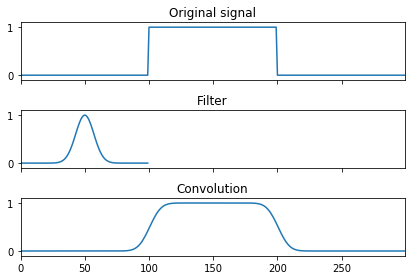

In [5]:
from scipy import signal
%matplotlib inline
import matplotlib.pyplot as plt

alpha = 0.01
sig = np.repeat([0., 1., 0.], 100)
filt = np.exp(-alpha * (np.arange(100)-50)**2)
filtered = signal.convolve(sig, filt, mode='same') / sum(filt)

fig, (ax_orig, ax_filt, ax_filtered) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.margins(0, 0.1)
ax_filt.plot(filt)
ax_filt.margins(0, 0.1)
ax_filtered.plot(filtered)
ax_filtered.margins(0, 0.1)

ax_orig.set_title('Original signal')
ax_filt.set_title('Filter')
ax_filtered.set_title('Convolution')

fig.tight_layout()

## Быстрый матвек с Тёплицевой матрицей

**Ключевая идея**: умножение Тёплицевой матрицы на вектор может быть сведено к умножению циркулянта на вектор.

- Действительно, каждая Тёплицева матрица размера $n\times n$ может быть вложена в циркулянт $C$ размера $2n \times 2n$:

$$
C = 
\begin{pmatrix}
T & \dots \\
\dots & \dots
\end{pmatrix}.
$$

- Матрицу $T = \begin{pmatrix} 
t_0 & t_{-1} & t_{-2} \\
t_{1} & t_{0} & t_{-1} \\
t_{2} & t_{1} & t_0 \\
\end{pmatrix}$ 
можно вложить следующим образом

$$
C = 
\begin{pmatrix} 
t_0 & t_{-1} & t_{-2} & t_{2} & t_{1}\\
t_{1} & t_{0} & t_{-1} & t_{-2} & t_{2} \\
t_{2} & t_{1} & t_0 & t_{-1} & t_{-2} \\
t_{-2}& t_{2} & t_{1} & t_0 & t_{-1}  \\
t_{-1} & t_{-2} & t_{2} & t_{1} & t_0  
\end{pmatrix}.
$$

- Для вычисления матвека 
$ \begin{pmatrix} y_1 \\ y_2 \\ y_3 \end{pmatrix}=
\begin{pmatrix} 
t_0 & t_{-1} & t_{-2} \\
t_{1} & t_{0} & t_{-1} \\
t_{2} & t_{1} & t_0 \\
\end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}$

мы дополняем вектор $x$ нулями:

$$
\begin{pmatrix} y_1 \\ y_2 \\ y_3 \\ \star \\ \star \end{pmatrix} =
\begin{pmatrix} 
t_0 & t_{-1} & t_{-2} & t_{2} & t_{1}\\
t_{1} & t_{0} & t_{-1} & t_{-2} & t_{2} \\
t_{2} & t_{1} & t_0 & t_{-1} & t_{-2} \\
t_{-2}& t_{2} & t_{1} & t_0 & t_{-1}  \\
t_{-1} & t_{-2} & t_{2} & t_{1} & t_0  
\end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ 0 \\ 0 \end{pmatrix}=
\text{ifft}(\text{fft}(\begin{pmatrix} t_0 \\ t_{1} \\ t_{2} \\ t_{-2} \\ t_{-1} \end{pmatrix})\circ \text{fft}(\begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ 0 \\ 0 \end{pmatrix})).
$$

- Заметим, что вам **не нужно формировать и хранить** всю матрицу $T$

## Многоуровневые Тёплицевые матрицы

Двумерная свёртка определяется как

$$
y_{i_1i_2} = \sum_{j_1,j_2=1}^n t_{i_1-j_1, i_2-j_2} x_{j_1 j_2}.
$$

- Отметим, что $x$ и $y$ – двумерные массивы, а $T$ – четырёхмерный. 
- Для сведения этого выражения к умножению матрицы на вектор необходимо вытянуть матрицы $x$ и $y$ в векторы:

$$
\text{vec}(x) = 
\begin{pmatrix}
x_{11} \\ \vdots \\ x_{1n} \\ \hline \\ \vdots \\ \hline \\ x_{n1} \\ \vdots \\ x_{nn}
\end{pmatrix},
\quad
\text{vec}(y) = 
\begin{pmatrix}
y_{11} \\ \vdots \\ y_{1n} \\ \hline \\ \vdots \\ \hline \\ y_{n1} \\ \vdots \\ y_{nn}
\end{pmatrix}.
$$

- В этом случае матрица $T$ станет **блочно Тёплицевой с Тёплицевыми блоками:** (BTTB)

$$
T = 
\begin{pmatrix} 
T_0 & T_{-1} & T_{-2} &  \dots & T_{1-n} \\
T_{1} & T_{0} & T_{-1} & \dots & T_{2-n} \\
T_{2} & T_{1} & T_0 & \dots & T_{3-n} \\
\dots & \dots & \dots &  \dots & \dots\\
T_{n-1} & T_{n-2} & T_{n-3}  &\dots &T_0
\end{pmatrix},
\quad \text{где} \quad
T_k = t_{k, i_2 - j_2}\quad  \text{Тёплицевы матрицы}
$$

## Быстрый матвек с многоуровневой Тёплицевой матрицей

- Для получения быстрого алгоритма умножения BTTB матрицы на вектор надо вложить её в блочный циркулянт с циркулянтными блоками (BCCB)
- Аналог

$$\begin{pmatrix} y_1 \\ y_2 \\ y_3 \\ \star \\ \star \end{pmatrix} =
\text{ifft}(\text{fft}(\begin{pmatrix} t_0 \\ t_{1} \\ t_{2} \\ t_{-2} \\ t_{-1} \end{pmatrix})\circ\text{fft}(\begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ 0 \\ 0 \end{pmatrix})).$$

будет выглядеть 

$$ \begin{pmatrix} y_{11} & y_{12} & y_{13} & \star & \star \\ 
y_{21} & y_{22} & y_{23} & \star & \star \\  
y_{31} & y_{32} & y_{33} & \star & \star \\ 
\star & \star & \star & \star & \star \\  
\star & \star & \star & \star & \star \\  
\end{pmatrix} = \text{ifft2d}(\text{fft2d}(\begin{pmatrix} t_{0,0} & t_{1,0} & t_{2,0} & t_{-2,0} & t_{-1,0} \\ 
t_{0,1} & t_{1,1} & t_{2,1} & t_{-2,1} & t_{-1,1} \\  
t_{0,2} & t_{1,2} & t_{2,2} & t_{-2,2} & t_{-1,2} \\ 
t_{0,-2} & t_{1,-2} & t_{2,-2} & t_{-2,-2} & t_{-1,-2} \\ 
t_{0,-1} & t_{1,-1} & t_{2,-1} & t_{-2,-1} & t_{-1,-1}
\end{pmatrix}) \circ \text{fft2d}(\begin{pmatrix}x_{11} & x_{12} & x_{13} & 0 & 0 \\ 
x_{21} & x_{22} & x_{23} & 0 & 0 \\  
x_{31} & x_{32} & x_{33} & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 \\  
0 & 0 & 0 & 0 & 0 \\  
\end{pmatrix})),$$

где ```fft2d``` двумерное FFT, состоящее из последовательных преобразований одномерного FFT сначала к строкам, а затем к столбцам (или наоборот)

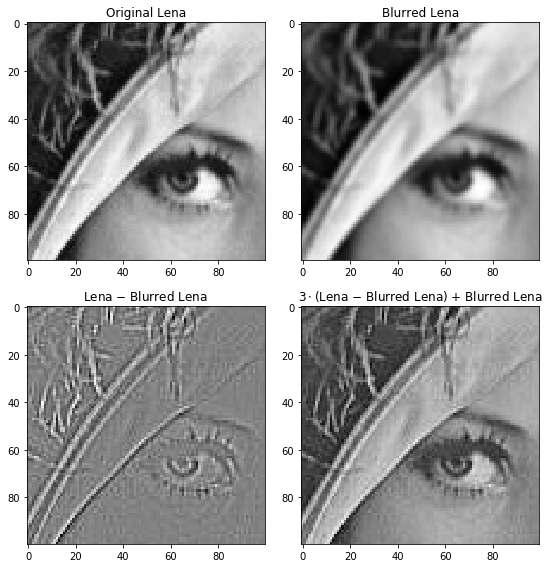

In [6]:
# Blurring and Sharpening Lena by convolution

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from scipy import misc
import imageio

filter_size = 3
filter_blur = np.ones((filter_size, filter_size)) / filter_size**2
lena = imageio.imread('./lena512.jpg')
#lena = misc.face()
#lena = lena[:, :, 0]
blurred = signal.convolve2d(lena, filter_blur, boundary='symm', mode='same')

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(lena[200:300, 200:300], cmap='gray')
ax[0, 0].set_title('Original Lena')
ax[0, 1].imshow(blurred[200:300, 200:300], cmap='gray')
ax[0, 1].set_title('Blurred Lena')
ax[1, 0].imshow((lena - blurred)[200:300, 200:300], cmap='gray')
ax[1, 0].set_title('Lena $-$ Blurred Lena')
ax[1, 1].imshow(((lena - blurred)*3 + blurred)[200:300, 200:300], cmap='gray')
ax[1, 1].set_title('$3\cdot$(Lena $-$ Blurred Lena) + Blurred Lena')
fig.tight_layout()

## Решение линейных систем с Тёплицевыми матрицами

- Что такое свёртка понятно, но как быть если нужно сделать обратную операцию (**deconvolution**) или другими словами решить линейную систему с Тёплицевой матрицей?

$$T x = f.$$

- Для периодического случая, в котором $T = C$ и является циркулянтом, у нас есть спектральная теорема

$$C = \frac{1}{n}F^* \Lambda F, \quad C^{-1} = \frac{1}{n}F^* \Lambda^{-1} F,$$

но для произвольной Тёплицевой матрицы это нетривиальный вопрос.

## Итерационные методы

- Неплохой рецепт для Тёплицевых линейных систем – это использовать итерационные методы, так как доступен быстрый матвек.

- В качестве предобуславливателя хорошо подойдёт **циркулянт**.

## Циркулянтный предобуславливатель

- Естественным подходов к построению предобуславливателя является использование циркулянтов, так как с ними легко решать линейные системы.

- Первый такой предобуславливатель предложили **Raymond Chan и Gilbert Strang**, и в качестве вектора для генерации циркулянта использовали первый столбец Тёплицевой матрицы.

- Другой предобуславливатель предложил **Tony Chan**, идея тоже довольно очевидна: 

$$C = \arg \min_P \Vert P - T \Vert_F.$$

- Можно получить простые формулы для элементов матрицы $C$.

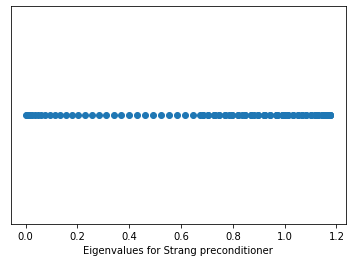

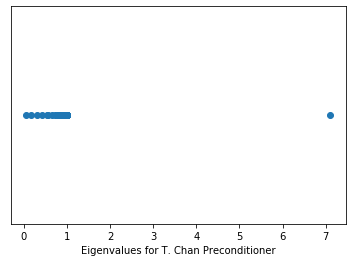

In [3]:
import numpy as np
import scipy.linalg as splin
%matplotlib inline
import matplotlib.pyplot as plt

n = 100
c = np.zeros(n)
c[0] = -2
c[1] = 1
Tm = splin.toeplitz(c, c)


c1 = splin.circulant(c) #Strang preconditioner
Fmat = 1.0/np.sqrt(n) * np.fft.fft(np.eye(n)) #Poor man's Fourier matrix

d2 = np.diag(Fmat.conj().dot(Tm).dot(Fmat))
c2 = Fmat.dot(np.diag(d2)).dot(Fmat.conj().T)


mat = np.linalg.inv(c1).dot(Tm)
ev = np.linalg.eigvals(mat).real
plt.plot(np.sort(ev), np.ones(n), 'o')
plt.xlabel('Eigenvalues for Strang preconditioner')
plt.gca().get_yaxis().set_visible(False)

mat = np.linalg.inv(c2).dot(Tm)
ev = np.linalg.eigvals(mat).real
plt.figure()
plt.plot(np.sort(ev), np.ones(n), 'o')
plt.xlabel('Eigenvalues for T. Chan Preconditioner')
plt.gca().get_yaxis().set_visible(False)


## Прямые методы для Тёплицевых матриц

- Идея с предобуславливателем работает для свёрток в 2D/3D, но гораздо хуже.

- В одномерном случае возхможно найти прямой метод для Тёплицевых матриц, основываясь на структуре обратной матрицы

- Но матрица, обратная к Тёплицевой, не является Тёплицевой!

- Что делать?

## Low displacement rank структура

- Тёплицевы матрицы относятся к более широкому классу матриц с **low displacement rank**.

- Определим матрицу периодичного сдвига и шкалирования $Z_e$, которая при умножение на вектор $x$ преобразует его по правилу

$$Z_e x = \begin{bmatrix}
e x_{n-1} \\
x_1 \\
x_2 \\
\vdots \\
x_{n-2}
\end{bmatrix}
$$

- Какова матричная форма этого линейного оператора?

## Матрицы сдвига, матрицы смещения и Тёплицевы матрицы

Пусть дана Тёплицева матрица $T$, выберем любые $e, f$ такие что $ef \ne 1$ и определим оператор смещения

$$L(T) = Z_e T - T Z_f.$$

Для Тёплицевой матрицы $L(T)$ имеет **ранг 2** (только первая строка и последний столбец не нулевые)

In [7]:
import numpy as np
import scipy.linalg as splin
n = 5 
c = np.zeros(n)
c[0] = -2
c[1] = 1
T = splin.toeplitz(c, c)
e = 0.5
f = 0.5
def Z_shift(e):
    return  np.diag(np.ones(n-1), -1)  + e * np.diag(np.ones(1), n-1)

Z1 = Z_shift(e)
Z2 = Z_shift(f)
L = Z1.dot(T) - T.dot(Z2)
print(L)
s = np.linalg.svd(L, compute_uv=False)
print(s)

[[-1.   0.   0.   0.5  0. ]
 [ 0.   0.   0.   0.  -0.5]
 [ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1. ]]
[1.11803399 1.11803399 0.         0.         0.        ]


- А что насчёт обратной матрицы?

- Она также имеет ранг $2$!

In [6]:
import numpy as np
import scipy.linalg as splin
n = 5 
c = np.zeros(n)
c[0] = -2
c[1] = 1
T = splin.toeplitz(c, c)
e = 0.5
f = 0.5
def Z_shift(e):
    return  np.diag(np.ones(n-1), -1)  + e * np.diag(np.ones(1), n-1)

Z1 = Z_shift(e)
Z2 = Z_shift(f)

Tinv = np.linalg.inv(T)

p1 = Z1.dot(Tinv) - Tinv.dot(Z2)
np.linalg.svd(p1)[1]

array([1.02062073e+00, 1.02062073e+00, 2.60439840e-16, 6.95949729e-17,
       2.21601201e-17])

## Low displacement rank: определение

- Матрица обладает **displacement rank $r$** по отношению к паре генераторов $Z_e, Z_f$, если

$$L(T) = Z_e T - T Z_f = GH^{\top},$$

где $G$ размера $n \times r$ и $H$ – $n \times r$.

- Это похоже на "дискретную производную"

## Теорема о структуре обратной матрицы

Пусть для $T$ выполнено

$$Z_e T - T Z_f = GH ^{\top},$$

и пусть она обратима.

Тогда выполнены следующие соотношения

$$T^{-1} (Z_e T - T Z_f) T^{-1} = T^{-1} Z_e - Z_f T^{-1} = T^{-1} G H^{\top} T^{-1},$$

то есть обратная матрица имеет **малый displacement rank** с перевёрнутой парой генераторов $Z_e, Z_f$ (почему?).

## Восстановление матрицы из смещённого представления  (displacement representation)

- Нам нужно решить уравнение вида

$$Z_e T - T Z_f = GH^{\top} = B$$

для заданной правой части.

- Это скрытая система линейных уравнений! (Какой у её размер?)

## Уравнение Сильвестра

- Уравнение выше является частным случаем матричного уравнения Сильвестра, которое в общем виде записывается как

$$AX - X B = C,$$

где матрицы $A$, $B$ и $C$ даны.

- В общем случае это линейная система с $\mathcal{O}(n^2)$ неизвестными, и ожидаемые затраты на решение равны $\mathcal{O}(n^6)$.

- Однако уравнение Сильвестра можно решить за $\mathcal{O}(n^3)$ (подробности в следующей лекции о матричных функциях и матричных уравнениях)

- Но для конкретных $A, B$ можно лучше!

## Назад к частному случаю

- Для частного случая у нас есть

$$Z_e T - T Z_f = GH^{\top} = B,$$

и решение задаётся 

$$ (e - f) T = \sum_{j = 1}^r Z_e(g_j) Z_f( J h_j), $$

где $Z_e$ – это $e$-масштабируемый циркулянт, а векторы $g_j$, и $h_j$ столбцы матриц $G$ и $H$, а $J$ – **пер-единичная матрица** (у которой единицы стоят на анти-диагонали).

## Формула Gohberg-Semencul'a

- На основе этой идеи и для частного случая $e = 0, f \rightarrow \inf$ существует следующая формула для представления обратной матрицы к Тёплицевой матрице в виде суммы двух произведений треугольных Тёплицевых матриц.

- Пусть $A$ – Тёплицева матрица и

$$A \begin{bmatrix} x_0 \\ x_1 \\ \vdots \\ x_n \end{bmatrix}=\begin{bmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix},
\quad 
A \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n \end{bmatrix}=\begin{bmatrix} 0 \\ 0 \\ \vdots \\ 1 \end{bmatrix}
$$

тогда 

$$A^{-1} = \frac{1}{x_0} \begin{bmatrix} x_0 & 0 & \ldots & 0 \\ x_1 & x_0 & 0 & \ldots \\ \ldots & \ldots \\ x_n & \ldots & \ldots & x_0 \end{bmatrix}\begin{bmatrix} u_0 & u_1 & \ldots & 0 \\ 0 & u_0 & u_1 & \ldots \\ \ldots & \ldots \\ 0 & \ldots & \ldots & u_0 \end{bmatrix}-\frac{1}{x_0} \begin{bmatrix} 0 & 0 & \ldots & 0 \\ y_0 & 0 & 0 & \ldots \\ y_1 & y_0 & \ldots  \\ \ldots & \ldots & \\ y_{n-1} & \ldots & y_0 & 0 \end{bmatrix}\begin{bmatrix} 0 & v_0 & \ldots & 0 \\ 0 & 0 & v_0 & v_1 \\ \ldots & \ldots   \\ \ldots & \ldots & \ldots & v_0 \\ 0 & \ldots & \ldots & 0\end{bmatrix},$$

где $u_y = y_{n-i}, \quad v_i = x_{n-i}$.

- Основной смысл: обратная матрица может быть восстановлена из **первого столбца** и **последнего столбца**.

## Быстрые и супербыстрые прямые методы

- Эти формулы позволили получить быстрые $\mathcal{O}(n^2)$ и супербыстрые $\mathcal{O}(n \log n)$ методы для Тёплицевых матриц.

- Основная идея здесь – это использовать метод дополнения (augmentation). 

- Пусть уже вычислена обратная матрица к $(n-1) \times (n-1)$ блоку Тёплицевой матрицы.

- Вам нужно только два вектора, чтобы представить обратную матрицу

- Тогда бОльшая матрица может быть представлена в блочном виде.

$$T_n = \begin{bmatrix} T_{n-1} & a \\ b^{\top} & c \end{bmatrix}.$$

- И нужно пересчитать только первый и последний столбец!

## Пересчёт последнего и первого столбца

- Давайте разделим вектор $x$ на два блока

$$x = \begin{bmatrix} x_1 & x_2 \end{bmatrix}.$$

- Тогда

$$T_{n-1} x_1 + a x_2 = e_1, \quad b^{\top} x_1 + c x_2 = 0.$$

- Или

$$  x_1 = T^{-1}_{n-1} e_1 - T^{-1}_{n-1} a x_2.$$

- Умножение $T^{-1}_{n-1}$ на вектор стоит $\mathcal{O}(n \log n)$ операций, поэтому $x_2$ можно восстановить за такое же число операций. Общая сложность тогда составит $\mathcal{O}(n^2 \log n)$ операций.

- **Супербыстрые алгоритмы** получают через сведения задачи к блочному исключению (в стиле работы с Фурье матрицей)

## Другие типы матриц с low-displacement rank

- Ганкелевы матрицы
- Матрицы Коши
- Матрицы Вандермонда

## Резюме

- Тёплицевы матрицы, циркулянты, спектральная теорема, быстрое преобразование Фурье (FFT)
- Многоуровневые Тёплицевы матрицы
- Low displacement rank

In [21]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()